# Constants

In [1]:
WORK_DIR_PATH = "c:/Users/jayar/Desktop/바탕 화면/새 폴더/"

# Split
FILTER_BY = "user"
TRN_VAL_TST_RATIO = [0.8, 0.1, 0.1]
NEG_PER_POS = [1, 1, 100, 100]
BATCH_SIZE = [128, 128, 32, 1]

# Model
N_FACTORS = 16
HIDDEN = [N_FACTORS*4, N_FACTORS*2, N_FACTORS]
DROPOUT = 0.2
MODEL_NAME = "VER_1_1.1.1"

# How to Learn
LEARNING_RATE = 1e-4
LAMBDA_ = 1e-2

# Fit
N_EPOCHS = 100

# Config

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.chdir(WORK_DIR_PATH)
print(f"DIRECTORY: {os.getcwd()}")

DIRECTORY: c:\Users\jayar\Desktop\바탕 화면\새 폴더


In [3]:
import pandas as pd
import torch

In [ ]:
from models import NeuMF
from MYUTILS import (
    msr,
    ranking,
    et_cetera,
)
from MYUTILS.config.constants import (
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_LABEL_COL,
    DEFAULT_TIMESTAMP_COL,
    DEFAULT_PREDICTION_COL,
    DEFAULT_K,
    SEED,
)

In [5]:
# Seed
et_cetera.seed.reset(SEED)

SETTING ALL SEEDS TO 42...
ALL SEEDS SET


In [6]:
# Available GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Data Preparation

In [7]:
# Upload Data
DATA_NAME = "ml-100k"
DATA_PATH = f"./data/{DATA_NAME}.csv"
data = pd.read_csv(DATA_PATH)

In [8]:
# Columns
COL_LIST = ['userId', 'movieId', 'rating', 'timestamp']

RE_COL_LIST = [
    DEFAULT_USER_COL,
    DEFAULT_ITEM_COL,
    DEFAULT_RATING_COL,
    DEFAULT_TIMESTAMP_COL,
]

RENAMES = dict(zip(COL_LIST, RE_COL_LIST))

data = data[COL_LIST]
data = data.rename(columns=RENAMES)


# Label encoding
kwargs = dict(
    data=data, 
    col_user=DEFAULT_USER_COL, 
    col_item=DEFAULT_ITEM_COL,
)

data, user_label, item_label = et_cetera.data.label_encoding(**kwargs)


# Number of user, item
N_USERS = data[DEFAULT_USER_COL].nunique()
N_ITEMS = data[DEFAULT_ITEM_COL].nunique()


# Select quartile users
LOW_USER, HIGH_USER = et_cetera.data.user_interaction_quantile(data)

In [9]:
# data Description
et_cetera.data.description(data)

number of user: 610
number of item: 9724
total interaction: 100836
mean interaction of user: 165
mean interaction of item: 10
interaction density: 1.7000 %


In [10]:
kwargs = dict(
    data=data,
    n_users=N_USERS,
    n_items=N_ITEMS,
    col_user=DEFAULT_USER_COL,
    col_item=DEFAULT_ITEM_COL,
)

dataloader = ranking.trn_val_tst.Module(**kwargs)

kwargs = dict(
    filter_by=FILTER_BY,
    trn_val_tst_ratio=TRN_VAL_TST_RATIO,
    neg_per_pos=NEG_PER_POS,
    batch_size=BATCH_SIZE,
    seed=SEED,
    )

(trn_loader, val_loader, tst_loader, loo_loader), trn_pos_per_user = dataloader.get(**kwargs)

# Modeling

In [ ]:
kwargs = dict(
    n_users=N_USERS,
    n_items=N_ITEMS,
    n_factors=N_FACTORS,
    hidden=HIDDEN,
    dropout=DROPOUT,
    model_name=MODEL_NAME,
)

model = NeuMF.MODEL.Module(**kwargs)

In [ ]:
kwargs = dict(
    model=model,
    lr=LEARNING_RATE,
    lambda_=LAMBDA_,
)

loop = NeuMF.LOOP.Module(**kwargs)

# Train

In [13]:
kwargs = dict(
    trn_loader=trn_loader,
    val_loader=val_loader,
    n_epochs=N_EPOCHS,
)

history = loop.fit(**kwargs)

EPOCH 1 START ---->>>>


Epoch 1/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 205.56it/s]


TRN TASK LOSS: 0.7300


Epoch 1/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 727.11it/s]


VAL TASK LOSS: 0.7092


Epoch 2/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 212.24it/s]


TRN TASK LOSS: 0.7083


Epoch 2/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 510.47it/s]


VAL TASK LOSS: 0.6994


Epoch 3/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 205.97it/s]


TRN TASK LOSS: 0.6974


Epoch 3/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 696.60it/s]


VAL TASK LOSS: 0.6933


Epoch 4/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 221.75it/s]


TRN TASK LOSS: 0.6916


Epoch 4/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 643.53it/s]


VAL TASK LOSS: 0.6870


Epoch 5/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 199.63it/s]


TRN TASK LOSS: 0.6878


Epoch 5/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 587.91it/s]


VAL TASK LOSS: 0.6837


Epoch 6/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 181.34it/s]


TRN TASK LOSS: 0.6840


Epoch 6/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 564.78it/s]


VAL TASK LOSS: 0.6778


Epoch 7/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.73it/s]


TRN TASK LOSS: 0.6806


Epoch 7/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 482.55it/s]


VAL TASK LOSS: 0.6727


Epoch 8/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.75it/s]


TRN TASK LOSS: 0.6762


Epoch 8/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 497.24it/s]


VAL TASK LOSS: 0.6673


Epoch 9/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.42it/s]


TRN TASK LOSS: 0.6710


Epoch 9/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 510.25it/s]


VAL TASK LOSS: 0.6616


Epoch 10/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 187.33it/s]


TRN TASK LOSS: 0.6643


Epoch 10/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 760.22it/s]


VAL TASK LOSS: 0.6509
EPOCH 11 START ---->>>>


Epoch 11/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 223.90it/s]


TRN TASK LOSS: 0.6583


Epoch 11/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 626.30it/s]


VAL TASK LOSS: 0.6440


Epoch 12/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 175.00it/s]


TRN TASK LOSS: 0.6534


Epoch 12/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 623.40it/s]


VAL TASK LOSS: 0.6341


Epoch 13/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 234.93it/s]


TRN TASK LOSS: 0.6448


Epoch 13/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 582.73it/s]


VAL TASK LOSS: 0.6263


Epoch 14/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 183.57it/s]


TRN TASK LOSS: 0.6394


Epoch 14/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 612.13it/s]


VAL TASK LOSS: 0.6154


Epoch 15/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 179.35it/s]


TRN TASK LOSS: 0.6347


Epoch 15/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 569.81it/s]


VAL TASK LOSS: 0.6137


Epoch 16/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.63it/s]


TRN TASK LOSS: 0.6280


Epoch 16/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 440.29it/s]


VAL TASK LOSS: 0.6027


Epoch 17/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.57it/s]


TRN TASK LOSS: 0.6251


Epoch 17/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 477.73it/s]


VAL TASK LOSS: 0.5947


Epoch 18/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 155.78it/s]


TRN TASK LOSS: 0.6184


Epoch 18/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 472.84it/s]


VAL TASK LOSS: 0.5890


Epoch 19/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.08it/s]


TRN TASK LOSS: 0.6094


Epoch 19/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 488.72it/s]


VAL TASK LOSS: 0.5793


Epoch 20/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.70it/s]


TRN TASK LOSS: 0.6048


Epoch 20/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.45it/s]


VAL TASK LOSS: 0.5747
EPOCH 21 START ---->>>>


Epoch 21/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.77it/s]


TRN TASK LOSS: 0.5956


Epoch 21/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 502.89it/s]


VAL TASK LOSS: 0.5635


Epoch 22/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.16it/s]


TRN TASK LOSS: 0.5880


Epoch 22/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 477.28it/s]


VAL TASK LOSS: 0.5535


Epoch 23/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.27it/s]


TRN TASK LOSS: 0.5767


Epoch 23/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 517.79it/s]


VAL TASK LOSS: 0.5365


Epoch 24/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.92it/s]


TRN TASK LOSS: 0.5632


Epoch 24/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 527.18it/s]


VAL TASK LOSS: 0.5276


Epoch 25/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 140.74it/s]


TRN TASK LOSS: 0.5536


Epoch 25/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 489.26it/s]


VAL TASK LOSS: 0.5142


Epoch 26/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.64it/s]


TRN TASK LOSS: 0.5393


Epoch 26/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 502.38it/s]


VAL TASK LOSS: 0.4996


Epoch 27/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 155.94it/s]


TRN TASK LOSS: 0.5274


Epoch 27/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 492.76it/s]


VAL TASK LOSS: 0.4906


Epoch 28/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.54it/s]


TRN TASK LOSS: 0.5144


Epoch 28/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.65it/s]


VAL TASK LOSS: 0.4776


Epoch 29/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.81it/s]


TRN TASK LOSS: 0.5023


Epoch 29/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 481.64it/s]


VAL TASK LOSS: 0.4679


Epoch 30/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.47it/s]


TRN TASK LOSS: 0.4888


Epoch 30/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 508.48it/s]


VAL TASK LOSS: 0.4573
EPOCH 31 START ---->>>>


Epoch 31/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.08it/s]


TRN TASK LOSS: 0.4743


Epoch 31/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 521.37it/s]


VAL TASK LOSS: 0.4435


Epoch 32/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 160.57it/s]


TRN TASK LOSS: 0.4611


Epoch 32/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 466.58it/s]


VAL TASK LOSS: 0.4400


Epoch 33/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 160.20it/s]


TRN TASK LOSS: 0.4477


Epoch 33/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 520.81it/s]


VAL TASK LOSS: 0.4193


Epoch 34/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.43it/s]


TRN TASK LOSS: 0.4364


Epoch 34/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 488.43it/s]


VAL TASK LOSS: 0.4142


Epoch 35/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.49it/s]


TRN TASK LOSS: 0.4232


Epoch 35/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 455.27it/s]


VAL TASK LOSS: 0.3977


Epoch 36/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.05it/s]


TRN TASK LOSS: 0.4070


Epoch 36/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 463.10it/s]


VAL TASK LOSS: 0.3872


Epoch 37/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.69it/s]


TRN TASK LOSS: 0.3941


Epoch 37/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 457.85it/s]


VAL TASK LOSS: 0.3735


Epoch 38/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 158.32it/s]


TRN TASK LOSS: 0.3853


Epoch 38/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 503.65it/s]


VAL TASK LOSS: 0.3707


Epoch 39/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.85it/s]


TRN TASK LOSS: 0.3745


Epoch 39/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 494.04it/s]


VAL TASK LOSS: 0.3626


Epoch 40/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.26it/s]


TRN TASK LOSS: 0.3657


Epoch 40/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 509.54it/s]


VAL TASK LOSS: 0.3567
EPOCH 41 START ---->>>>


Epoch 41/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 135.32it/s]


TRN TASK LOSS: 0.3595


Epoch 41/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 481.25it/s]


VAL TASK LOSS: 0.3491


Epoch 42/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.72it/s]


TRN TASK LOSS: 0.3513


Epoch 42/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 488.64it/s]


VAL TASK LOSS: 0.3382


Epoch 43/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.57it/s]


TRN TASK LOSS: 0.3418


Epoch 43/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 492.40it/s]


VAL TASK LOSS: 0.3453


Epoch 44/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.31it/s]


TRN TASK LOSS: 0.3398


Epoch 44/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 489.44it/s]


VAL TASK LOSS: 0.3373


Epoch 45/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.28it/s]


TRN TASK LOSS: 0.3323


Epoch 45/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.48it/s]


VAL TASK LOSS: 0.3349


Epoch 46/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 151.72it/s]


TRN TASK LOSS: 0.3291


Epoch 46/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.99it/s]


VAL TASK LOSS: 0.3459


Epoch 47/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.09it/s]


TRN TASK LOSS: 0.3258


Epoch 47/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 477.76it/s]


VAL TASK LOSS: 0.3262


Epoch 48/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 134.49it/s]


TRN TASK LOSS: 0.3161


Epoch 48/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 436.93it/s]


VAL TASK LOSS: 0.3333


Epoch 49/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.99it/s]


TRN TASK LOSS: 0.3085


Epoch 49/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 485.16it/s]


VAL TASK LOSS: 0.3277


Epoch 50/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 157.44it/s]


TRN TASK LOSS: 0.3045


Epoch 50/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 517.37it/s]


VAL TASK LOSS: 0.3161
EPOCH 51 START ---->>>>


Epoch 51/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.11it/s]


TRN TASK LOSS: 0.2942


Epoch 51/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 474.65it/s]


VAL TASK LOSS: 0.3201


Epoch 52/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.72it/s]


TRN TASK LOSS: 0.2863


Epoch 52/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 487.66it/s]


VAL TASK LOSS: 0.3169


Epoch 53/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.42it/s]


TRN TASK LOSS: 0.2803


Epoch 53/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 518.22it/s]


VAL TASK LOSS: 0.3104


Epoch 54/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.39it/s]


TRN TASK LOSS: 0.2725


Epoch 54/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 520.72it/s]


VAL TASK LOSS: 0.2960


Epoch 55/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.03it/s]


TRN TASK LOSS: 0.2650


Epoch 55/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 498.10it/s]


VAL TASK LOSS: 0.3011


Epoch 56/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.85it/s]


TRN TASK LOSS: 0.2596


Epoch 56/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 519.18it/s]


VAL TASK LOSS: 0.2962


Epoch 57/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.59it/s]


TRN TASK LOSS: 0.2568


Epoch 57/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 495.03it/s]


VAL TASK LOSS: 0.3034


Epoch 58/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.85it/s]


TRN TASK LOSS: 0.2514


Epoch 58/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 469.87it/s]


VAL TASK LOSS: 0.2985


Epoch 59/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.47it/s]


TRN TASK LOSS: 0.2465


Epoch 59/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 523.54it/s]


VAL TASK LOSS: 0.2888


Epoch 60/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.42it/s]


TRN TASK LOSS: 0.2426


Epoch 60/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 509.66it/s]


VAL TASK LOSS: 0.2915
EPOCH 61 START ---->>>>


Epoch 61/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.80it/s]


TRN TASK LOSS: 0.2355


Epoch 61/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 517.82it/s]


VAL TASK LOSS: 0.2962


Epoch 62/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 143.13it/s]


TRN TASK LOSS: 0.2344


Epoch 62/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.78it/s]


VAL TASK LOSS: 0.2857


Epoch 63/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 145.32it/s]


TRN TASK LOSS: 0.2281


Epoch 63/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 463.94it/s]


VAL TASK LOSS: 0.2880


Epoch 64/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.75it/s]


TRN TASK LOSS: 0.2235


Epoch 64/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 526.23it/s]


VAL TASK LOSS: 0.2871


Epoch 65/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 137.41it/s]


TRN TASK LOSS: 0.2207


Epoch 65/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 455.72it/s]


VAL TASK LOSS: 0.2917


Epoch 66/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.23it/s]


TRN TASK LOSS: 0.2197


Epoch 66/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 461.54it/s]


VAL TASK LOSS: 0.2904


Epoch 67/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.29it/s]


TRN TASK LOSS: 0.2125


Epoch 67/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 527.92it/s]


VAL TASK LOSS: 0.2879


Epoch 68/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.53it/s]


TRN TASK LOSS: 0.2122


Epoch 68/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 504.31it/s]


VAL TASK LOSS: 0.2850


Epoch 69/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 144.43it/s]


TRN TASK LOSS: 0.2086


Epoch 69/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 497.84it/s]


VAL TASK LOSS: 0.2810


Epoch 70/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.95it/s]


TRN TASK LOSS: 0.2037


Epoch 70/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 492.67it/s]


VAL TASK LOSS: 0.2802
EPOCH 71 START ---->>>>


Epoch 71/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 163.68it/s]


TRN TASK LOSS: 0.1995


Epoch 71/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 478.20it/s]


VAL TASK LOSS: 0.2774


Epoch 72/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 150.15it/s]


TRN TASK LOSS: 0.1993


Epoch 72/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 464.83it/s]


VAL TASK LOSS: 0.2708


Epoch 73/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 136.25it/s]


TRN TASK LOSS: 0.1968


Epoch 73/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 490.71it/s]


VAL TASK LOSS: 0.2789


Epoch 74/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.33it/s]


TRN TASK LOSS: 0.1953


Epoch 74/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 485.17it/s]


VAL TASK LOSS: 0.2738


Epoch 75/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 154.75it/s]


TRN TASK LOSS: 0.1903


Epoch 75/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 474.62it/s]


VAL TASK LOSS: 0.2752


Epoch 76/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.46it/s]


TRN TASK LOSS: 0.1904


Epoch 76/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 485.24it/s]


VAL TASK LOSS: 0.2723


Epoch 77/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 156.85it/s]


TRN TASK LOSS: 0.1845


Epoch 77/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 425.31it/s]


VAL TASK LOSS: 0.2666


Epoch 78/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 146.31it/s]


TRN TASK LOSS: 0.1838


Epoch 78/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 448.92it/s]


VAL TASK LOSS: 0.2704


Epoch 79/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.77it/s]


TRN TASK LOSS: 0.1841


Epoch 79/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 438.68it/s]


VAL TASK LOSS: 0.2716


Epoch 80/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 171.88it/s]


TRN TASK LOSS: 0.1820


Epoch 80/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 566.42it/s]


VAL TASK LOSS: 0.2695
EPOCH 81 START ---->>>>


Epoch 81/100 TRN: 100%|██████████| 627/627 [00:02<00:00, 241.36it/s]


TRN TASK LOSS: 0.1815


Epoch 81/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 729.53it/s]


VAL TASK LOSS: 0.2682


Epoch 82/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 192.84it/s]


TRN TASK LOSS: 0.1785


Epoch 82/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 520.70it/s]


VAL TASK LOSS: 0.2673


Epoch 83/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 172.69it/s]


TRN TASK LOSS: 0.1774


Epoch 83/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 518.09it/s]


VAL TASK LOSS: 0.2815


Epoch 84/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 158.69it/s]


TRN TASK LOSS: 0.1787


Epoch 84/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 473.13it/s]


VAL TASK LOSS: 0.2770


Epoch 85/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 153.52it/s]


TRN TASK LOSS: 0.1765


Epoch 85/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 476.99it/s]


VAL TASK LOSS: 0.2692


Epoch 86/100 TRN: 100%|██████████| 627/627 [00:03<00:00, 158.04it/s]


TRN TASK LOSS: 0.1748


Epoch 86/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 453.96it/s]


VAL TASK LOSS: 0.2624


Epoch 87/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 141.43it/s]


TRN TASK LOSS: 0.1726


Epoch 87/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 469.00it/s]


VAL TASK LOSS: 0.2671


Epoch 88/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.67it/s]


TRN TASK LOSS: 0.1733


Epoch 88/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 450.35it/s]


VAL TASK LOSS: 0.2637


Epoch 89/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 149.04it/s]


TRN TASK LOSS: 0.1702


Epoch 89/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 447.71it/s]


VAL TASK LOSS: 0.2695


Epoch 90/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.99it/s]


TRN TASK LOSS: 0.1699


Epoch 90/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 439.27it/s]


VAL TASK LOSS: 0.2597
EPOCH 91 START ---->>>>


Epoch 91/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.83it/s]


TRN TASK LOSS: 0.1688


Epoch 91/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 482.05it/s]


VAL TASK LOSS: 0.2773


Epoch 92/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.27it/s]


TRN TASK LOSS: 0.1684


Epoch 92/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 477.36it/s]


VAL TASK LOSS: 0.2782


Epoch 93/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.70it/s]


TRN TASK LOSS: 0.1672


Epoch 93/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 520.67it/s]


VAL TASK LOSS: 0.2736


Epoch 94/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 147.54it/s]


TRN TASK LOSS: 0.1627


Epoch 94/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 461.98it/s]


VAL TASK LOSS: 0.2626


Epoch 95/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 143.17it/s]


TRN TASK LOSS: 0.1606


Epoch 95/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 480.57it/s]


VAL TASK LOSS: 0.2684


Epoch 96/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.07it/s]


TRN TASK LOSS: 0.1625


Epoch 96/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 469.19it/s]


VAL TASK LOSS: 0.2757


Epoch 97/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 152.86it/s]


TRN TASK LOSS: 0.1632


Epoch 97/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 521.61it/s]


VAL TASK LOSS: 0.2710


Epoch 98/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 148.70it/s]


TRN TASK LOSS: 0.1614


Epoch 98/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 432.96it/s]


VAL TASK LOSS: 0.2708


Epoch 99/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 156.00it/s]


TRN TASK LOSS: 0.1598


Epoch 99/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 475.96it/s]


VAL TASK LOSS: 0.2727


Epoch 100/100 TRN: 100%|██████████| 627/627 [00:04<00:00, 135.58it/s]


TRN TASK LOSS: 0.1577


Epoch 100/100 VAL: 100%|██████████| 79/79 [00:00<00:00, 495.38it/s]

VAL TASK LOSS: 0.2616


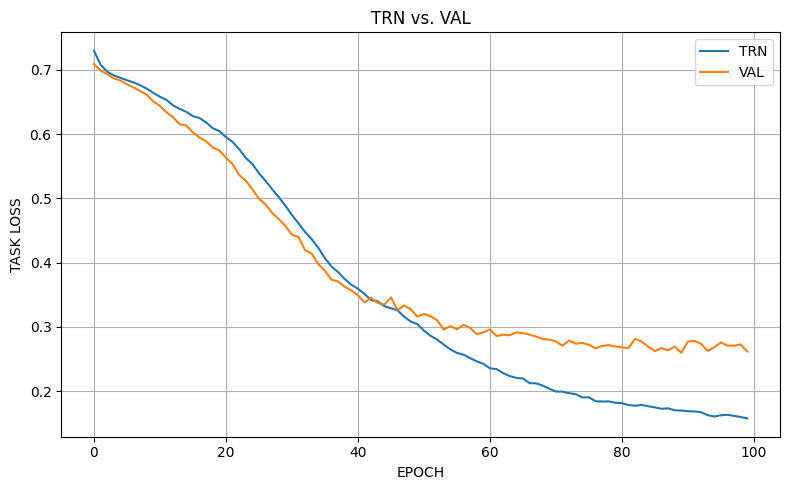

In [14]:
et_cetera.vis.plot_loss(history, 'TASK LOSS')

# Test

### TST Data

In [15]:
kwargs = dict(
    tst_loader=tst_loader,
)

result = loop.predict(**kwargs)

TST: 100%|██████████| 314/314 [00:01<00:00, 288.75it/s]


In [16]:
trues = result['true'][result['true'][DEFAULT_USER_COL]==LOW_USER]

preds = result['pred'][
    result['pred'][DEFAULT_USER_COL]==LOW_USER
    ].sort_values(
        by=DEFAULT_PREDICTION_COL,
        ascending=False
    ).head(20)

merged = pd.merge(
    preds,
    trues,
    on=[DEFAULT_USER_COL, DEFAULT_ITEM_COL],
    how='inner'
)

merged

,userId,itemId,prediction,label
0,133,254,0.903809,0.0
1,133,364,0.895996,0.0
2,133,217,0.892090,1.0
3,133,549,0.890625,0.0
4,133,444,0.881836,1.0
5,133,885,0.871094,0.0
6,133,940,0.861328,0.0
7,133,522,0.791504,0.0
8,133,620,0.786133,0.0
9,133,163,0.745605,1.0


In [17]:
trues = result['true'][result['true'][DEFAULT_USER_COL]==HIGH_USER]

preds = result['pred'][
    result['pred'][DEFAULT_USER_COL]==HIGH_USER
    ].sort_values(
        by=DEFAULT_PREDICTION_COL,
        ascending=False
    ).head(20)

merged = pd.merge(
    preds,
    trues,
    on=[DEFAULT_USER_COL, DEFAULT_ITEM_COL],
    how='inner'
)

merged

,userId,itemId,prediction,label
0,330,224,0.908691,0.0
1,330,899,0.908203,0.0
2,330,899,0.908203,0.0
3,330,899,0.908203,0.0
4,330,899,0.908203,0.0
5,330,2224,0.907715,1.0
6,330,2144,0.907227,0.0
7,330,706,0.907227,0.0
8,330,5901,0.907227,1.0
9,330,1297,0.907227,0.0


In [18]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.895082
PRECISION@10: 0.246885
RECALL@10: 0.362720
MAP@10: 0.213307
NDCG@10: 0.386133
AGGDIV@10: 0.116721
MEAN NOVELTY@10: 9.860231
MEAN SERENDIPITY@10: 0.213279
PERSONALIZATION@10: 0.960120


In [19]:
TOP_K = 20

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 0.977049
PRECISION@20: 0.193033
RECALL@20: 0.506806
MAP@20: 0.248483
NDCG@20: 0.429234
AGGDIV@20: 0.120000
MEAN NOVELTY@20: 10.332897
MEAN SERENDIPITY@20: 0.164754
PERSONALIZATION@20: 0.958434


In [20]:
TOP_K = 50

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 1.000000
PRECISION@50: 0.124754
RECALL@50: 0.677530
MAP@50: 0.276962
NDCG@50: 0.482310
AGGDIV@50: 0.117705
MEAN NOVELTY@50: 11.186005
MEAN SERENDIPITY@50: 0.096951
PERSONALIZATION@50: 0.957672


In [21]:
TOP_K = 100

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 1.000000
PRECISION@100: 0.083098
RECALL@100: 0.783047
MAP@100: 0.290398
NDCG@100: 0.519024
AGGDIV@100: 0.105656
MEAN NOVELTY@100: 11.991799
MEAN SERENDIPITY@100: 0.059475
PERSONALIZATION@100: 0.956209


In [22]:
TOP_K = 10
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.937500
PRECISION@10: 0.206250
RECALL@10: 0.365616
MAP@10: 0.268872
NDCG@10: 0.415130
AGGDIV@10: 0.712500
MEAN NOVELTY@10: 9.797774
MEAN SERENDIPITY@10: 0.181250
PERSONALIZATION@10: 0.943333


In [23]:
TOP_K = 20
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@20: 1.000000
PRECISION@20: 0.156250
RECALL@20: 0.458648
MAP@20: 0.289306
NDCG@20: 0.446562
AGGDIV@20: 0.725000
MEAN NOVELTY@20: 10.276073
MEAN SERENDIPITY@20: 0.128125
PERSONALIZATION@20: 0.947083


In [24]:
TOP_K = 50
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@50: 1.000000
PRECISION@50: 0.088750
RECALL@50: 0.548977
MAP@50: 0.300878
NDCG@50: 0.466411
AGGDIV@50: 0.745000
MEAN NOVELTY@50: 11.203033
MEAN SERENDIPITY@50: 0.062500
PERSONALIZATION@50: 0.951833


In [25]:
TOP_K = 100
QUARTER = 0.25

user_counts = data[DEFAULT_USER_COL].value_counts()
low_threshold = user_counts.quantile(QUARTER)
low_users = user_counts[user_counts<=low_threshold]

low_preds = result['pred'][result['pred'][DEFAULT_USER_COL].isin(low_users)]

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=low_preds,
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@100: 1.000000
PRECISION@100: 0.069375
RECALL@100: 0.729828
MAP@100: 0.317494
NDCG@100: 0.534162
AGGDIV@100: 0.745625
MEAN NOVELTY@100: 11.926896
MEAN SERENDIPITY@100: 0.050000
PERSONALIZATION@100: 0.952250


### Leave-One-Out Data

In [27]:
kwargs = dict(
    tst_loader=loo_loader,
)

result = loop.predict(**kwargs)

TST: 100%|██████████| 610/610 [00:00<00:00, 674.05it/s]


In [28]:
TOP_K = 10

kwargs = dict(
    model_name=model.model_name,
    origin=data,
    rating_true=result['true'],
    rating_pred=result['pred'],
    k=TOP_K,
)

eval = ranking.metrics.eval_top_k(**kwargs)

HR@10: 0.785246
PRECISION@10: 0.078525
RECALL@10: 0.785246
MAP@10: 0.443002
NDCG@10: 0.524467
AGGDIV@10: 0.358197
MEAN NOVELTY@10: 11.526546
MEAN SERENDIPITY@10: 0.072131
PERSONALIZATION@10: 0.994453
